In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import os
import cv2



In [2]:
import keras
from keras.layers import (Activation, BatchNormalization, Conv2D, Dense,
                          Dropout, Flatten, MaxPooling2D)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPool2D,Flatten,Dense

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
x_train=train_datagen.flow_from_directory('flower_img/train/',target_size=(64,64),batch_size=32,class_mode='binary')

Found 3019 images belonging to 5 classes.


In [7]:
x_test=test_datagen.flow_from_directory('flower_img/test/',target_size=(64,64),batch_size=32,class_mode='binary')

Found 438 images belonging to 5 classes.


In [8]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [9]:
model=Sequential()

In [10]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

In [11]:
model.add(Dense(units=300,kernel_initializer="random_uniform",activation="elu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(units=200,kernel_initializer="random_uniform",activation="elu"))



In [12]:
model.add(Dense(units=4,kernel_initializer="random_uniform",activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30752)             0         
_________________________________________________________________
dense (Dense)                (None, 300)               9225900   
_________________________________________________________________
batch_normalization (BatchNo (None, 300)               1200      
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6

In [14]:
from keras.optimizers import RMSprop , SGD , Adam
from keras.callbacks import ModelCheckpoint , EarlyStopping , ReduceLROnPlateau

In [15]:
"""
Here we will monitor the val_loss which is minimum and saving it
"""

earlystop = EarlyStopping(monitor="val_loss",
                        min_delta=0,
                        patience=3,
                        restore_best_weights=True,
                        verbose=1)

"""
Here we will monitor the val_loss whith 3 extra epoches and retain the best weighted file
"""

reduce_lr = ReduceLROnPlateau(monitor="val_loss",
                             factor=0.2,
                             patience=3,
                             verbose=1,
                             min_delta=0.0001)

In [16]:
callbacks=[earlystop,reduce_lr]
model.compile(loss="binary_crossentropy",optimizer=Adam(lr=0.01,beta_1=0.1),metrics=['accuracy'])

In [18]:
a=model.fit(x_train,steps_per_epoch=39,epochs=25,callbacks=callbacks,validation_data=x_test,validation_steps=10)

Epoch 1/25
39/39 [==============================] - 9s 224ms/step - loss: 2.6467 - accuracy: 0.1777 - val_loss: 2.5798 - val_accuracy: 0.1656
Epoch 2/25
39/39 [==============================] - 8s 211ms/step - loss: 2.5585 - accuracy: 0.1851 - val_loss: 2.5656 - val_accuracy: 0.1437
Epoch 3/25
39/39 [==============================] - 8s 195ms/step - loss: 2.5856 - accuracy: 0.1803 - val_loss: 2.5352 - val_accuracy: 0.1469
Epoch 4/25
39/39 [==============================] - 7s 184ms/step - loss: 2.5145 - accuracy: 0.2086 - val_loss: 2.5167 - val_accuracy: 0.1688
Epoch 5/25
39/39 [==============================] - 8s 196ms/step - loss: 2.4823 - accuracy: 0.2083 - val_loss: 2.6233 - val_accuracy: 0.1719
Epoch 6/25
39/39 [==============================] - 8s 203ms/step - loss: 2.5633 - accuracy: 0.1891 - val_loss: 2.4480 - val_accuracy: 0.1531
Epoch 7/25
39/39 [==============================] - 8s 197ms/step - loss: 2.5387 - accuracy: 0.2019 - val_loss: 2.4749 - val_accuracy: 0.1031
Epoch 

In [20]:
model.save("flowers1.h5")

In [21]:
from tensorflow.keras.models import load_model

In [22]:
from tensorflow.keras.preprocessing import image

In [23]:
import numpy as np

In [26]:
model = load_model('flowers1.h5')

In [27]:
img=image.load_img('898102603_2d5152f09a.jpg',target_size=(64,64))

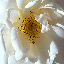

In [28]:
img

In [29]:
x=image.img_to_array(img)

In [30]:
x.shape

(64, 64, 3)

In [31]:
x=np.expand_dims(x,axis=0)

In [32]:
x

array([[[[234., 252., 252.],
         [225., 239., 240.],
         [222., 238., 238.],
         ...,
         [115., 102.,  93.],
         [113.,  96.,  88.],
         [109.,  99.,  89.]],

        [[231., 249., 249.],
         [228., 248., 247.],
         [231., 247., 247.],
         ...,
         [117., 102.,  95.],
         [109.,  96.,  87.],
         [104.,  96.,  85.]],

        [[234., 252., 252.],
         [227., 245., 247.],
         [234., 250., 250.],
         ...,
         [111., 101.,  99.],
         [116.,  97.,  93.],
         [107.,  98.,  81.]],

        ...,

        [[232., 252., 253.],
         [236., 254., 254.],
         [237., 253., 253.],
         ...,
         [110., 105.,  99.],
         [112., 111., 109.],
         [112., 107., 104.]],

        [[232., 253., 255.],
         [231., 251., 252.],
         [234., 252., 252.],
         ...,
         [112., 108., 105.],
         [111., 109., 110.],
         [111., 106., 102.]],

        [[229., 249., 250.],
       

In [33]:
pred_prob=model.predict(x)

In [34]:
pred_prob

array([[5.6149550e-03, 1.4416267e-15, 1.9780206e-03, 9.9240702e-01]],
      dtype=float32)

In [36]:
class_name=['daisy','dandelion','rose','sunflower','tulip']

In [37]:
pred_id=pred_prob.argmax(axis=1)[0]

In [38]:
pred_id

3

In [40]:
print('Predicted flower is',str(class_name[pred_id]))

Predicted flower is sunflower
